In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data=pd.read_csv('green_tech_data.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [4]:
#check missing values
data.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


In [5]:
#check if data is balanced or not
data['sustainability'].value_counts()
#not balanced

,count
sustainability,
0,85
1,15


In [6]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


<Axes: >

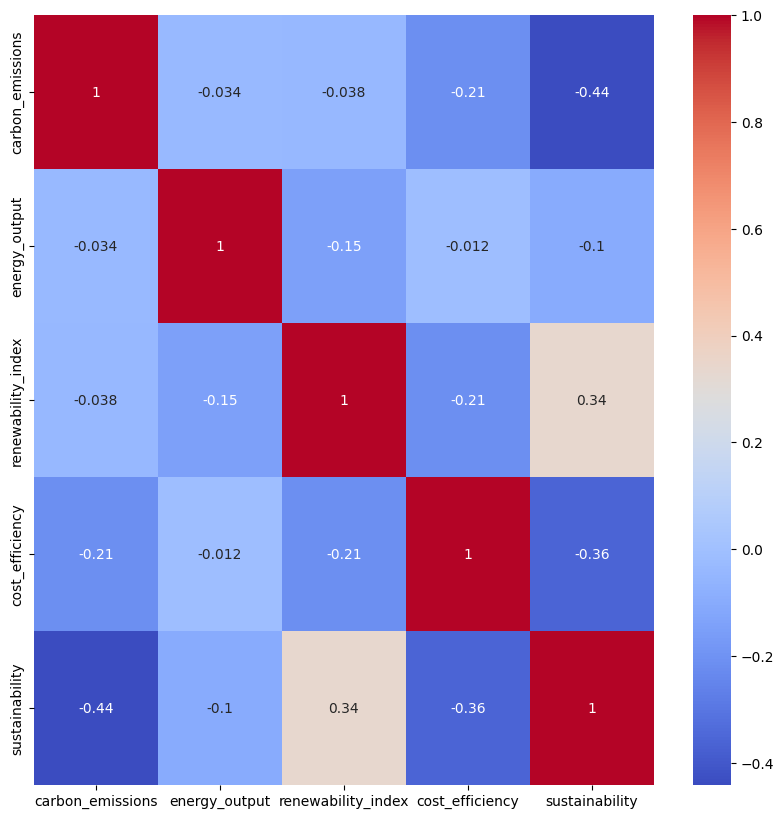

In [9]:
#create a heat map
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='coolwarm',annot=True)

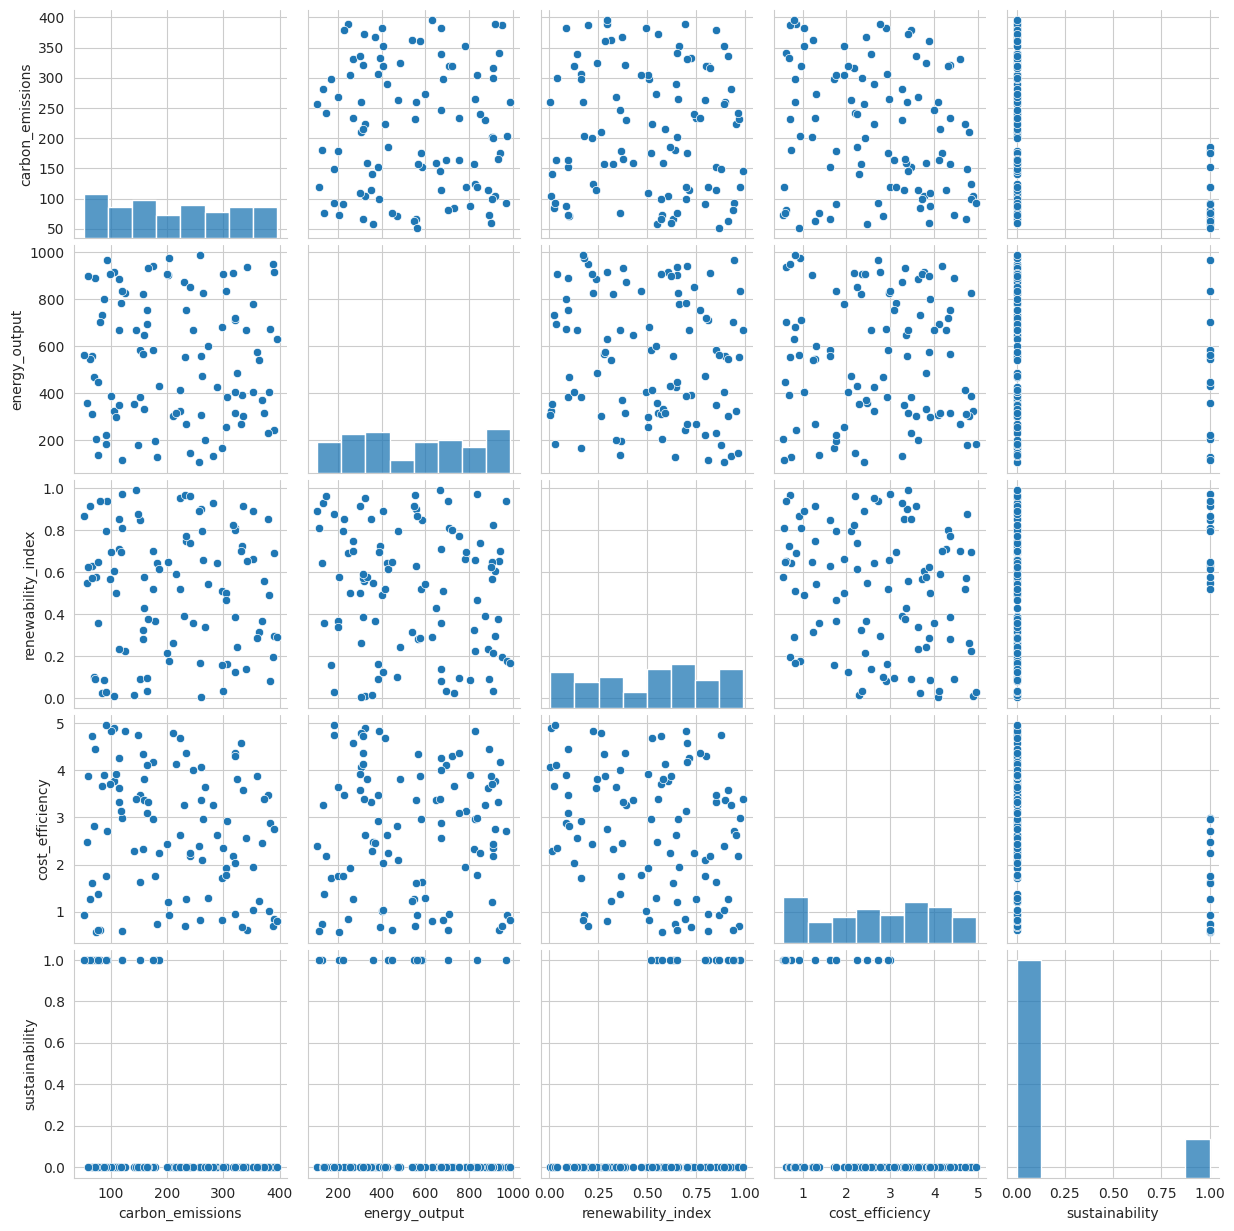

In [12]:
#pair plot with good colors
sns.set_style('whitegrid')
sns.pairplot(data)

In [22]:
#example feature selection
X=data[['carbon_emissions','renewability_index','cost_efficiency']]
y=data['sustainability']# target var

In [31]:
#Split the data into training and testing sets
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.4, random_state=42)

In [32]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [33]:
#make predictation on the test set
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
#accuracy score
print(f"accuracy: {accuracy_score(y_test,y_pred)}")

accuracy: 0.95


In [39]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[33  0]
 [ 2  5]]


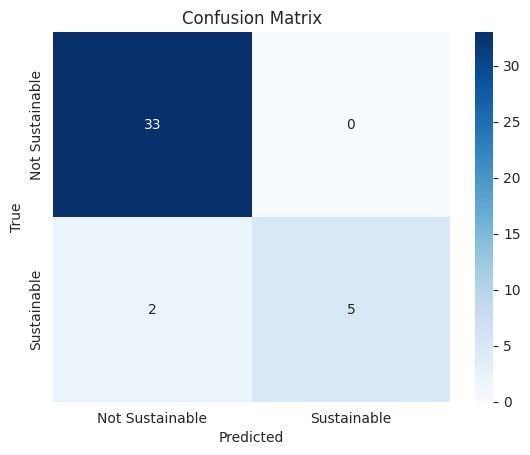

In [46]:
#confusion matrix graphically

conf_matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.71      0.83         7

    accuracy                           0.95        40
   macro avg       0.97      0.86      0.90        40
weighted avg       0.95      0.95      0.95        40



In [48]:
#feature importance
coefficients=pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coeficient'])
print(coefficients)

                    Coeficient
carbon_emissions     -0.017791
renewability_index    0.712932
cost_efficiency      -1.230857


In [50]:
import joblib
#save the modesl to a file
joblib.dump(model, 'lrmodel_sustainability.pkl')

['lrmodel_sustainability.pkl']

In [54]:
# Create a DataFrame with new data for prediction
new_data = pd.DataFrame({
    'carbon_emissions': [100, 200, 150],
    'renewability_index': [0.8, 0.9, 0.7],
    'cost_efficiency': [0.6, 0.7, 0.5]
})

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[1 0 1]
